In [1]:
import sys

from matplotlib import pyplot as plt

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing
import globalfunction.pp as pp  # importing

import pandas as pd
import seaborn as sns

df_original = vv.quick_data(publish=True)

remove duplicates: 21347/30862/24915/25021 ==> 21347/21398/21188/21195
21129
==> 21129
dataframe length: 21129
21129
19397
19392
18047
18028
allowing add_info to pass with 1257 nulls/NANs
allowing type to pass with 56 nulls/NANs
allowing bedrooms to pass with 753 nulls/NANs
dropping size because 15292 nulls/NANs is too many
dropping other_key_info because 18028 nulls/NANs is too many
allowing bullet_points to pass with 1821 nulls/NANs
allowing station_info to pass with 1 nulls/NANs
dropping hold_type because 12291 nulls/NANs is too many
allowing short_description to pass with 1 nulls/NANs
allowing long_description to pass with 4 nulls/NANs
allowing date_scraped_listing to pass with 1 nulls/NANs
allowing bedrooms_model to pass with 753 nulls/NANs
dropping auctionProvider because 18028 nulls/NANs is too many
dropping affordableBuyingScheme because 18028 nulls/NANs is too many
dropping prices.secondaryPrice because 18028 nulls/NANs is too many
dropping prices.displayPriceQualifier because

In [2]:
#df_original = df_original[df_original["Target"] != 'POA']
print(df_original.shape)
df_original.head(5)

(8905, 74)


,Description,Price,add_info,distance_to_any_train,type,bedrooms,bathrooms,bullet_points,station_info,short_description,...,analyticsProperty.priceQualifier,analyticsProperty.propertyId,analyticsProperty.propertySubType,analyticsProperty.propertyType,analyticsProperty.retirement,analyticsProperty.soldSTC,analyticsProperty.videoProvider,analyticsProperty.viewType,borough_name,floorplan_count
ids,,,,,,,,,,,,,,,,,,,,,
124059707,3 bedroom flat for sale,325000.0,"Added on 18/06/2022 by haart, Barkingside",0.5,Flat,3.0,1.0,2-3 Bedrooms;First Floor Flat;Well Presented T...,"[(0.5, 'Gants Hill Station', 'svg-underground'...",svg-camera=10;;svg-floorplan=1;;Read more,...,Guide Price,124059707.0,Flat,Flats / Apartments,False,False,No Video,Current,Redbridge,4.0
124056446,1 bedroom flat for sale,225000.0,"Added on 18/06/2022 by Ideal Locations, Ilford",0.1,Flat,1.0,1.0,Great Condition;Perfect for a FTB;Close to Exc...,"[(0.1, 'Goodmayes Station', 'svg-nationalrail'...",SOLD STC;;svg-camera=1;;Read more,...,None,124056446.0,Flat,Flats / Apartments,False,True,No Video,Current,Redbridge,1.0
124059386,1 bedroom flat for sale,225000.0,"Added on 18/06/2022 by Ideal Locations, Ilford",0.3,Flat,1.0,1.0,1 Bedroom Flat;Excellent condition;Close to Lo...,"[(0.3, 'Goodmayes Station', 'svg-nationalrail'...",SOLD STC;;svg-camera=1;;Read more,...,None,124059386.0,Flat,Flats / Apartments,False,True,No Video,Current,Redbridge,1.0
85324458,1 bedroom apartment for sale,225000.0,"Added on 17/05/2022 by haart, Ilford",0.9,Apartment,1.0,1.0,Purpose Built Second Floor Flat;Double Bedroom...,"[(0.9, 'Barking Station', 'svg-nationalrail;sv...",SOLD STC;;svg-camera=9;;svg-floorplan=1;;Read ...,...,Guide Price,85324458.0,Apartment,Flats / Apartments,False,True,No Video,Current,Redbridge,4.0
113260523,1 bedroom flat for sale,225000.0,Reduced on 11/11/2021 by Sandra Davidson Estat...,0.4,Flat,1.0,1.0,EPC RATING C;Duplex Flat;One bedroom;Lounge;Ki...,"[(0.4, 'Seven Kings Station', 'svg-nationalrai...",SOLD STC;;svg-camera=5;;svg-floorplan=1;;Read ...,...,Offers in Excess of,113260523.0,Flat,Flats / Apartments,False,True,No Video,Current,Redbridge,4.0


In [3]:
# for each in ['analyticsProperty.added','prices.pricePerSqFt']:
#     df_original[each] = pd.to_numeric(df_original[each], 'coerce').fillna(-1).astype(int)
# df_original.info()
#
# for each in ['analyticsProperty.auctionOnly']:
#     df_original[each] = pd.to_numeric(df_original[each], 'coerce').fillna(-1).astype(bool)
# df_original.info()

In [4]:
df_original.describe()

,Price,distance_to_any_train,bedrooms,bathrooms,bedrooms_model,bathrooms_model,location.latitude,location.longitude,analyticsBranch.branchId,analyticsProperty.added,analyticsProperty.beds,analyticsProperty.floorplanCount,analyticsProperty.imageCount,analyticsProperty.latitude,analyticsProperty.longitude,analyticsProperty.propertyId,floorplan_count
count,8905.000000,8905.000000,8905.000000,8905.000000,8905.000000,8905.000000,8905.000000,8905.000000,8905.000000,8.905000e+03,8905.000000,8905.000000,8905.000000,8905.000000,8905.000000,8.905000e+03,8905.000000
mean,409504.090399,0.451488,1.857833,1.176642,1.857833,1.176642,51.529829,-0.156935,89602.242560,2.021825e+07,1.857833,1.026727,11.612577,51.529829,-0.156935,1.142278e+08,4.239641
std,137970.458175,0.371316,0.803184,0.432447,0.803184,0.432447,0.070538,0.176045,76603.086658,4.690234e+03,0.803184,0.409572,4.674170,0.070538,0.176045,1.405348e+07,1.707319
min,88750.000000,0.000000,1.000000,1.000000,1.000000,1.000000,51.300120,-0.498166,339.000000,2.016122e+07,1.000000,0.000000,0.000000,51.300120,-0.498166,5.284596e+07,1.000000
25%,315000.000000,0.200000,1.000000,1.000000,1.000000,1.000000,51.489180,-0.301704,22317.000000,2.022012e+07,1.000000,1.000000,8.000000,51.489180,-0.301704,1.142203e+08,4.000000
50%,400000.000000,0.400000,2.000000,1.000000,2.000000,1.000000,51.533352,-0.151370,68844.000000,2.022041e+07,2.000000,1.000000,11.000000,51.533352,-0.151370,1.207682e+08,4.000000
75%,500000.000000,0.600000,2.000000,1.000000,2.000000,1.000000,51.581933,-0.053455,148607.000000,2.022052e+07,2.000000,1.000000,14.000000,51.581933,-0.053455,1.230744e+08,4.000000
max,900000.000000,12.900000,8.000000,16.000000,8.000000,16.000000,51.683060,0.276859,248933.000000,2.022070e+07,8.000000,16.000000,44.000000,51.683060,0.276859,1.245975e+08,64.000000


In [5]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4
sns.set_style('whitegrid')

#sns.pairplot(df_original)

In [6]:
plottable_columns = [x for x in df_original.columns if x not in ['tenure.yearsRemainingOnLease', 'address.incode', 'address.outcode',
                                                                 'location.latitude', 'location.longitude', 'analyticsProperty.added',
       'analyticsProperty.auctionOnly', 'analyticsProperty.minSizeFt',
       'analyticsProperty.maxSizeFt', 'prices.pricePerSqFt',
       'analyticsProperty.ownership', 'analyticsProperty.preOwned',
       'analyticsProperty.priceQualifier', 'analyticsProperty.soldSTC',
                                                                 'Price']]

plottable_columns

['Description',
 'add_info',
 'distance_to_any_train',
 'type',
 'bedrooms',
 'bathrooms',
 'bullet_points',
 'station_info',
 'short_description',
 'long_description',
 'virtualTours',
 'rooms',
 'nearestAirports',
 'nearestStations',
 'showSchoolInfo',
 'channel',
 'sizings',
 'bedrooms_model',
 'bathrooms_model',
 'transactionType',
 'tags',
 'infoReelItems',
 'soldPropertyType',
 'propertySubType',
 'businessForSale',
 'commercial',
 'commercialUseClasses',
 'status.published',
 'status.archived',
 'prices.primaryPrice',
 'listingHistory.listingUpdateReason',
 'tenure.tenureType',
 'sharedOwnership.sharedOwnership',
 'sharedOwnership.rentFrequency',
 'livingCosts.councilTaxExempt',
 'livingCosts.councilTaxIncluded',
 'analyticsBranch.agentType',
 'analyticsBranch.branchId',
 'analyticsBranch.branchName',
 'analyticsBranch.brandName',
 'analyticsBranch.companyName',
 'analyticsBranch.companyTradingName',
 'analyticsBranch.companyType',
 'analyticsBranch.pageType',
 'analyticsPropert

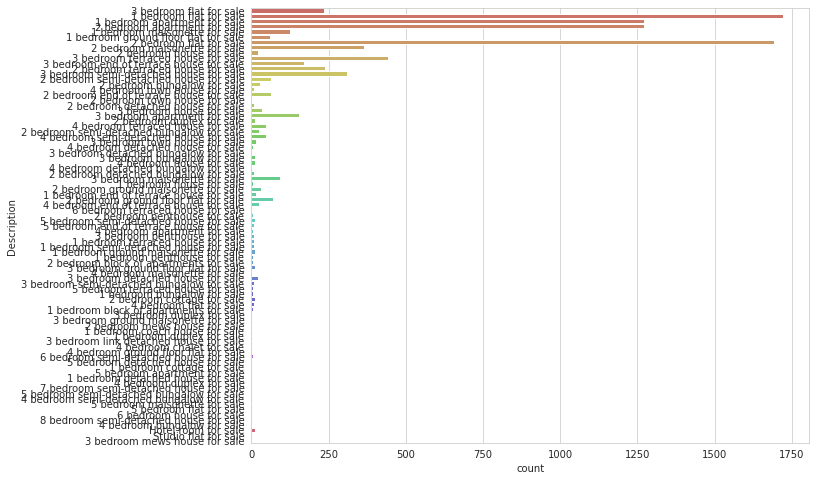

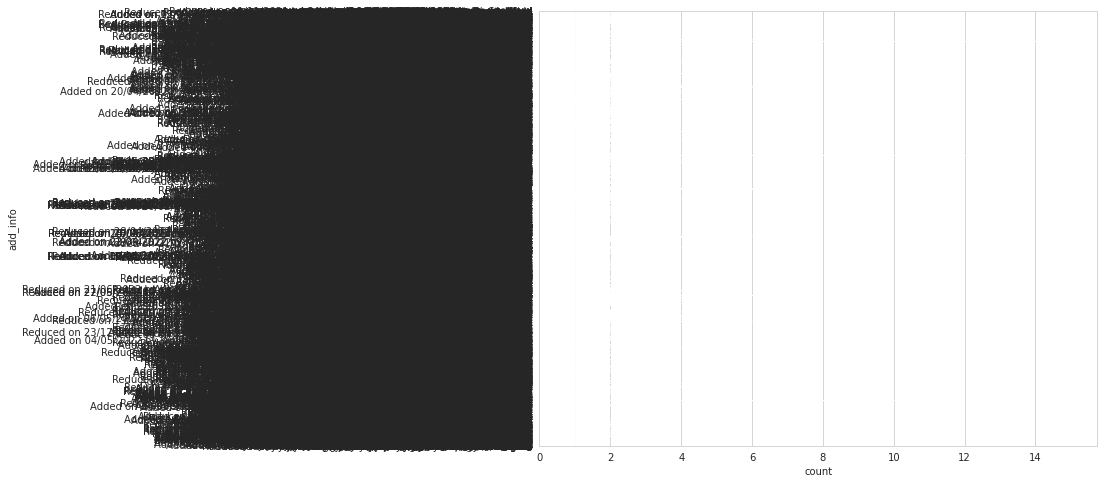

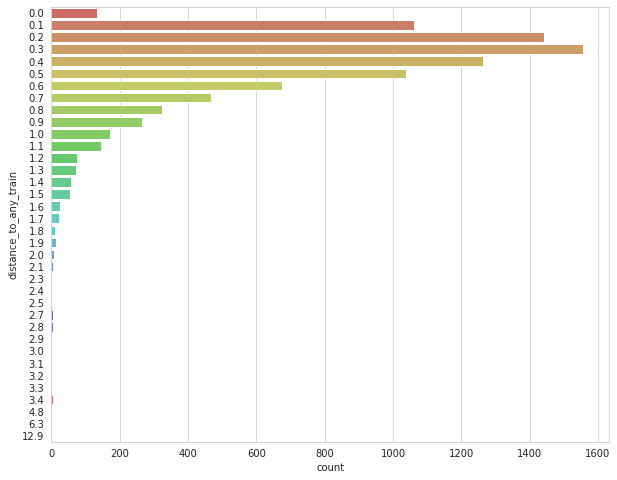

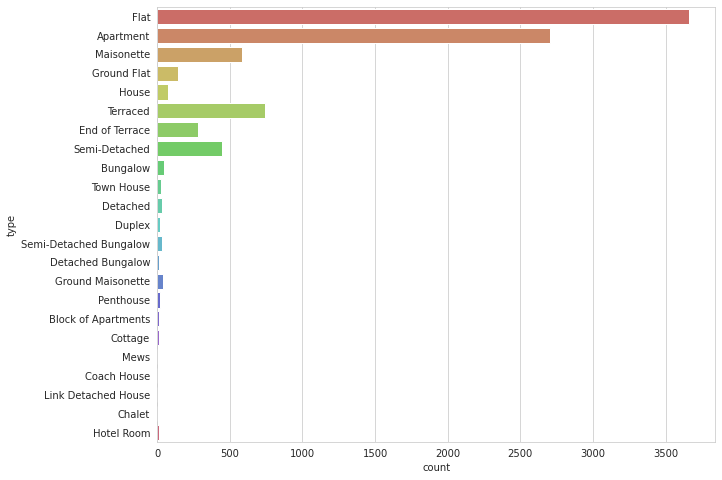

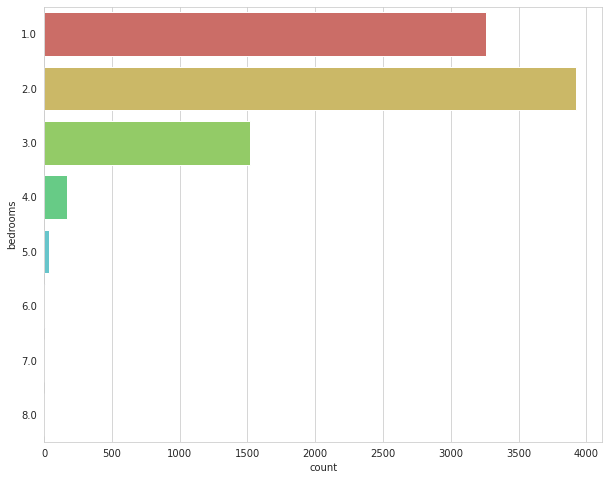

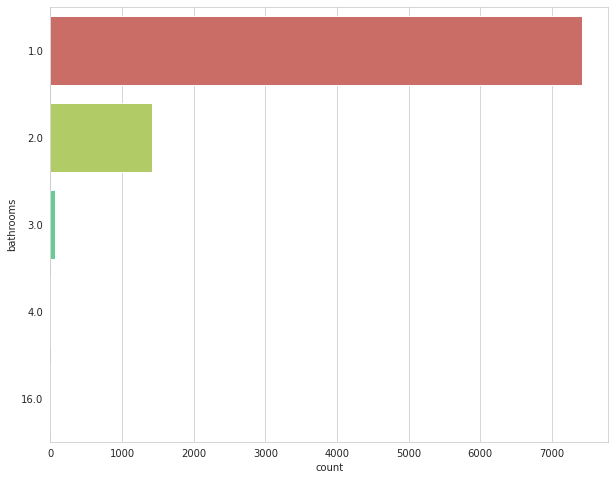

) missing from current font.tone_prework/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)
/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


In [ ]:
rcParams['figure.figsize'] = 10, 8
for each in plottable_columns:
    sns.countplot(y=each, data=df_original, palette='hls', orient='v')
    plt.show()
    #break

In [ ]:
rcParams['figure.figsize'] = 10, 8
for each in plottable_columns:
    sns.countplot(y=each, data=df_original, palette='hls', orient='v')
    plt.show()
    #break